In [1]:
#Import Packages
import pandas as pd 
import numpy as np 

#Visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Handling text data
import nltk
import re
import string

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
all_data = pd.read_csv('all_data.csv') #API & Kaggle has been combined

C:\Users\mende\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,4,7,9,14,15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA
## First cleaning dataset
## Kaggle Data (Labeled)
- Overall sentiment percentage
- Airlines percentage
- Wordcloud (Airline/Sentiment) & Top words
- Hashtag Analyzing
- Timeseries & Sentiment
- Sentiment percentage with Airline company

## Api Data (Unlabeled)
- Top words
- Hashtag
- Airlines percentage
- tweets volume timeseries 

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110255 entries, 0 to 110254
Data columns (total 28 columns):
Unnamed: 0                      110255 non-null int64
tweet_id                        110255 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         110255 non-null object
airline_sentiment_gold          40 non-null object
name                            110245 non-null object
negativereason_gold             32 non-null object
retweet_count                   110255 non-null int64
text                            110255 non-null object
tweet_coord                     1108 non-null object
tweet_created                   110255 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
hashtags                     

In [6]:
all_data[all_data.airline_sentiment.notna()].head()

Unnamed: 0            tweet_id airline_sentiment  \
0           0  570306133677760513           neutral   
1           1  570301130888122368          positive   
2           2  570301083672813571           neutral   
3           3  570301031407624196          negative   
4           4  570300817074462722          negative   

   airline_sentiment_confidence negativereason  negativereason_confidence  \
0                        1.0000            NaN                        NaN   
1                        0.3486            NaN                     0.0000   
2                        0.6837            NaN                        NaN   
3                        1.0000     Bad Flight                     0.7033   
4                        1.0000     Can't Tell                     1.0000   

          airline airline_sentiment_gold        name negativereason_gold  ...  \
0  Virgin America                    NaN     cairdin                 NaN  ...   
1  Virgin America                    NaN    jnardino                 NaN  ...   
2  Virgin America                    NaN  yvonnalynn                 NaN  ...   
3  Virgin America                    NaN    jnardino                 NaN  ...   
4  Virgin America                    NaN    jnardino                 NaN  ...   

   user_acc_date user_verified lang  \
0            NaN           NaN  NaN   
1            NaN           NaN  NaN   
2            NaN           NaN  NaN   
3            NaN           NaN  NaN   
4            NaN           NaN  NaN   

                                               sents  \
0            ['@VirginAmerica What @dhepburn said.']   
1  ["@VirginAmerica plus you've added commercials...   
2  ["@VirginAmerica I didn't today... Must mean I...   
3  ['@VirginAmerica it\'s really aggressive to bl...   
4  ["@VirginAmerica and it's a really big bad thi...   

                                               words upper_count caps_ratio  \
0  ['@', 'VirginAmerica', 'What', '@', 'dhepburn'...           0      0.000   
1  ['@', 'VirginAmerica', 'plus', 'you', "'ve", '...           0      0.000   
2  ['@', 'VirginAmerica', 'I', 'did', "n't", 'tod...           2      0.125   
3  ['@', 'VirginAmerica', 'it', "'s", 'really', '...           0      0.000   
4  ['@', 'VirginAmerica', 'and', 'it', "'s", 'a',...           0      0.000   

  num_expletives pun_ratio                                full_text_processed  
0              0  0.142857                    @virginamerica @dhepburn said .  
1              0  0.076923  @virginamerica plus added commercial experienc...  
2              0  0.062500  @virginamerica today ... must mean need take a...  
3              0  0.000000  @virginamerica really aggressive blast obnoxio...  
4              0  0.000000                @virginamerica really big bad thing  

[5 rows x 28 columns]

In [4]:
train = all_data[all_data.airline_sentiment.notna()]
testing = all_data[all_data.airline_sentiment.isna()]

In [9]:
train.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [8]:
print("Shape of data=>",train.shape)

Shape of data=> (14640, 28)


In [9]:
print("Shape of data=>",testing.shape)

Shape of data=> (95615, 28)


In [10]:
train.head()

Unnamed: 0            tweet_id airline_sentiment  \
0           0  570306133677760513           neutral   
1           1  570301130888122368          positive   
2           2  570301083672813571           neutral   
3           3  570301031407624196          negative   
4           4  570300817074462722          negative   

   airline_sentiment_confidence negativereason  negativereason_confidence  \
0                        1.0000            NaN                        NaN   
1                        0.3486            NaN                     0.0000   
2                        0.6837            NaN                        NaN   
3                        1.0000     Bad Flight                     0.7033   
4                        1.0000     Can't Tell                     1.0000   

          airline airline_sentiment_gold        name negativereason_gold  ...  \
0  Virgin America                    NaN     cairdin                 NaN  ...   
1  Virgin America                    NaN    jnardino                 NaN  ...   
2  Virgin America                    NaN  yvonnalynn                 NaN  ...   
3  Virgin America                    NaN    jnardino                 NaN  ...   
4  Virgin America                    NaN    jnardino                 NaN  ...   

   user_acc_date user_verified lang  \
0            NaN           NaN  NaN   
1            NaN           NaN  NaN   
2            NaN           NaN  NaN   
3            NaN           NaN  NaN   
4            NaN           NaN  NaN   

                                               sents  \
0            ['@VirginAmerica What @dhepburn said.']   
1  ["@VirginAmerica plus you've added commercials...   
2  ["@VirginAmerica I didn't today... Must mean I...   
3  ['@VirginAmerica it\'s really aggressive to bl...   
4  ["@VirginAmerica and it's a really big bad thi...   

                                               words upper_count caps_ratio  \
0  ['@', 'VirginAmerica', 'What', '@', 'dhepburn'...           0      0.000   
1  ['@', 'VirginAmerica', 'plus', 'you', "'ve", '...           0      0.000   
2  ['@', 'VirginAmerica', 'I', 'did', "n't", 'tod...           2      0.125   
3  ['@', 'VirginAmerica', 'it', "'s", 'really', '...           0      0.000   
4  ['@', 'VirginAmerica', 'and', 'it', "'s", 'a',...           0      0.000   

  num_expletives pun_ratio                                full_text_processed  
0              0  0.142857                    @virginamerica @dhepburn said .  
1              0  0.076923  @virginamerica plus added commercial experienc...  
2              0  0.062500  @virginamerica today ... must mean need take a...  
3              0  0.000000  @virginamerica really aggressive blast obnoxio...  
4              0  0.000000                @virginamerica really big bad thing  

[5 rows x 28 columns]

In [11]:
testing.head()

Unnamed: 0             tweet_id airline_sentiment  \
14640           0  1327762855999967233               NaN   
14641           1  1327762102174576640               NaN   
14642           2  1327762089327419392               NaN   
14643           3  1327761312882057217               NaN   
14644           4  1327760498125918213               NaN   

       airline_sentiment_confidence negativereason  negativereason_confidence  \
14640                           NaN            NaN                        NaN   
14641                           NaN            NaN                        NaN   
14642                           NaN            NaN                        NaN   
14643                           NaN            NaN                        NaN   
14644                           NaN            NaN                        NaN   

      airline airline_sentiment_gold            name negativereason_gold  ...  \
14640  United                    NaN  Allison Berger                 NaN  ...   
14641  United                    NaN      Jay Bonner                 NaN  ...   
14642  United                    NaN      MoneyBoy.k                 NaN  ...   
14643  United                    NaN    seanconnelly                 NaN  ...   
14644  United                    NaN       Carl Nash                 NaN  ...   

                        user_acc_date user_verified lang  \
14640  Wed Feb 29 00:23:39 +0000 2012         False   en   
14641  Wed Jul 30 13:01:46 +0000 2014         False   en   
14642  Sun Sep 17 19:04:15 +0000 2017         False   en   
14643  Mon Mar 02 03:27:40 +0000 2009         False   en   
14644  Mon Apr 18 00:07:19 +0000 2016         False   en   

                                                   sents  \
14640  ['Here’s a reason to fly @united!', 'I can’t w...   
14641  ['Landed at IAH.', 'volunteering with @TeamRub...   
14642          ['@RiverboatRonHC @united Amazing 🙏❤️❤️']   
14643  ['Illegal Ballot Harvesting in PA is Uncovered...   
14644  ['@Broncos @jsimms1119 @astronaut @I_CU_boy @u...   

                                                   words upper_count  \
14640  ['Here', '’', 's', 'a', 'reason', 'to', 'fly',...           1   
14641  ['Landed', 'at', 'IAH', '.', 'volunteering', '...           1   
14642  ['@', 'RiverboatRonHC', '@', 'united', 'Amazin...           0   
14643  ['Illegal', 'Ballot', 'Harvesting', 'in', 'PA'...           1   
14644  ['@', 'Broncos', '@', 'jsimms1119', '@', 'astr...           0   

      caps_ratio num_expletives pun_ratio  \
14640   0.037037              0  0.037037   
14641   0.041667              0  0.041667   
14642   0.000000              0  0.000000   
14643   0.066667              0  0.000000   
14644   0.000000              0  0.000000   

                                     full_text_processed  
14640  ’ reason fly @united ! ’ wait wear uniform 🥰 #...  
14641  landed iah . volunteering @teamrubicon thanks ...  
14642          @riverboatronhc @united amazing 🙏 ❤ ️ ❤ ️  
14643  illegal ballot harvesting pa uncovered https:/...  
14644  @broncos @jsimms1119 @astronaut @i_cu_boy @uni...  

[5 rows x 28 columns]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 0 to 14639
Data columns (total 28 columns):
Unnamed: 0                      14640 non-null int64
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
hashtags                        0 non-

In [13]:
train_nofeature = train.iloc[:, 0:29] #Without detail feteaures
testing_nofeature = testing.iloc[:, 0:29] 

In [14]:
train_nofeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 0 to 14639
Data columns (total 28 columns):
Unnamed: 0                      14640 non-null int64
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
hashtags                        0 non-

In [16]:
testing_nofeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95615 entries, 14640 to 110254
Data columns (total 28 columns):
Unnamed: 0                      95615 non-null int64
tweet_id                        95615 non-null int64
airline_sentiment               0 non-null object
airline_sentiment_confidence    0 non-null float64
negativereason                  0 non-null object
negativereason_confidence       0 non-null float64
airline                         95615 non-null object
airline_sentiment_gold          0 non-null object
name                            95605 non-null object
negativereason_gold             0 non-null object
retweet_count                   95615 non-null int64
text                            95615 non-null object
tweet_coord                     89 non-null object
tweet_created                   95615 non-null object
tweet_location                  0 non-null object
user_timezone                   0 non-null object
hashtags                        95615 non-null object
user

## Overall sentiment percentage (Kaggle - train dataset only)
#### there is no sentiment in testing dataset for now 

In [17]:
train_nofeature.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [18]:
train_nofeature.groupby('airline_sentiment')['tweet_id'].count() #Most tweets are negative

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: tweet_id, dtype: int64

In [19]:
sentiment_count = train_nofeature.groupby('airline_sentiment')['tweet_id'].count()

#### We can see that there are about 63% of tweets are negative in the training dataset

In [20]:
train_nofeature.groupby('airline_sentiment')['tweet_id'].count().apply(lambda x: round(x/train_nofeature.airline_sentiment.count(), 2))

airline_sentiment
negative    0.63
neutral     0.21
positive    0.16
Name: tweet_id, dtype: float64

In [22]:
sentiment_percent = train_nofeature.groupby('airline_sentiment')['tweet_id'].count().apply(lambda x: round(x/train_nofeature.airline_sentiment.count(), 2))

In [23]:
sns.set(style="darkgrid", context="poster")

Text(0.5, 1.0, 'Overall Sentiment for Training data (count)')

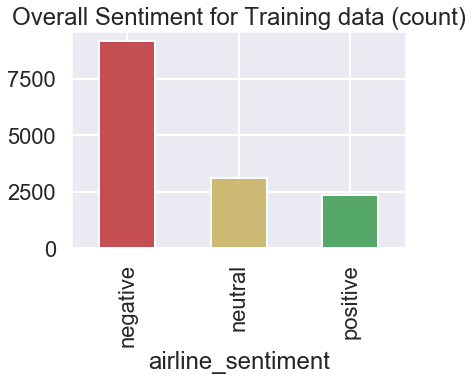

In [24]:
my_colors = ['r', 'y', 'g']
sentiment_count.plot.bar(color=my_colors)
plt.title('Overall Sentiment for Training data (count)')

Text(0, 0.5, '')

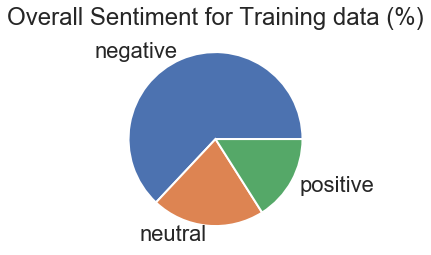

In [25]:
sentiment_percent.plot.pie()
plt.title('Overall Sentiment for Training data (%)')
plt.ylabel('')

#### Overall Airline company percentage (Training/Testing/All)

In [26]:
df = pd.concat([train, testing], ignore_index=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110255 entries, 0 to 110254
Data columns (total 28 columns):
Unnamed: 0                      110255 non-null int64
tweet_id                        110255 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         110255 non-null object
airline_sentiment_gold          40 non-null object
name                            110245 non-null object
negativereason_gold             32 non-null object
retweet_count                   110255 non-null int64
text                            110255 non-null object
tweet_coord                     1108 non-null object
tweet_created                   110255 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
hashtags                     

In [28]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American', 'Fly Frontier', 'Spirit Airlines', 'Sun Country Air',
       'Alaska Air', 'Cape Air', 'Haiwaiin Air', 'Jet Blue'], dtype=object)

In [29]:
df.groupby('airline')['tweet_id'].count()

airline
Alaska Air          6060
American           26579
Cape Air              58
Delta              24199
Fly Frontier        1332
Haiwaiin Air        1007
Jet Blue            5263
Southwest          21201
Spirit Airlines     2955
Sun Country Air      207
US Airways          2936
United             17929
Virgin America       529
Name: tweet_id, dtype: int64

Text(0.5, 1.0, 'Tweets of Airline Co.')

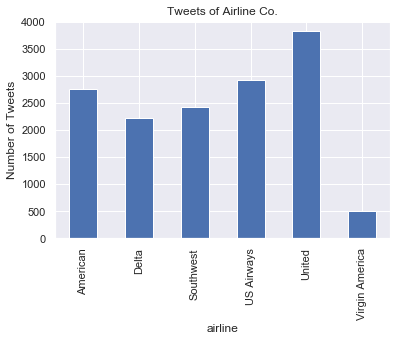

In [8]:
sns.set(style='darkgrid')
train.groupby('airline')['tweet_id'].count().plot.bar()
#some airline have too less tweets #whether we should filter them?
plt.ylabel('Number of Tweets')
plt.title('Tweets of Airline Co.')
#Be careful ob those company # of tweets below 500 in the later analysis

In [32]:
#Only visualize those airlines have tweets over 1000

In [36]:
df_airco = df.groupby('airline')['tweet_id'].count()[(df.groupby('airline')['tweet_id'].count() >= 1000)]

In [37]:
df_airco

airline
Alaska Air          6060
American           26579
Delta              24199
Fly Frontier        1332
Haiwaiin Air        1007
Jet Blue            5263
Southwest          21201
Spirit Airlines     2955
US Airways          2936
United             17929
Name: tweet_id, dtype: int64

Text(0, 0.5, '')

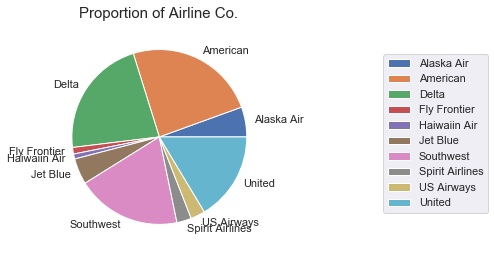

In [42]:
sns.set(style='darkgrid')
df_airco.plot.pie()
plt.title('Proportion of Airline Co.', loc='center', fontsize=15)
plt.gca().axis("equal")
plt.legend(df_airco.index, bbox_to_anchor=(1, 0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.ylabel('')

In [43]:
train.groupby('airline')['tweet_id'].count()

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: tweet_id, dtype: int64

In [44]:
testing.groupby('airline')['tweet_id'].count()

airline
Alaska Air          6060
American           23820
Cape Air              58
Delta              21977
Fly Frontier        1332
Haiwaiin Air        1007
Jet Blue            5263
Southwest          18781
Spirit Airlines     2955
Sun Country Air      207
US Airways            23
United             14107
Virgin America        25
Name: tweet_id, dtype: int64

### The distribution of sentiment in each airline co.

In [45]:
train_airco = train.groupby(['airline', 'airline_sentiment'])['tweet_id'].agg({'numbers':'count'})

C:\Users\mende\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [46]:
train_airco

numbers
airline        airline_sentiment         
American       negative              1960
               neutral                463
               positive               336
Delta          negative               955
               neutral                723
               positive               544
Southwest      negative              1186
               neutral                664
               positive               570
US Airways     negative              2263
               neutral                381
               positive               269
United         negative              2633
               neutral                697
               positive               492
Virgin America negative               181
               neutral                171
               positive               152

In [47]:
train_airco.groupby(level=0).apply(lambda x: round(100*x/float(x.sum()), 2))

numbers
airline        airline_sentiment         
American       negative             71.04
               neutral              16.78
               positive             12.18
Delta          negative             42.98
               neutral              32.54
               positive             24.48
Southwest      negative             49.01
               neutral              27.44
               positive             23.55
US Airways     negative             77.69
               neutral              13.08
               positive              9.23
United         negative             68.89
               neutral              18.24
               positive             12.87
Virgin America negative             35.91
               neutral              33.93
               positive             30.16

In [48]:
train_airco_percent = train_airco.groupby(level=0).apply(lambda x: round(100*x/float(x.sum()), 2))

In [49]:
train_airco_percent1 = train_airco_percent.reset_index(drop=False)

Text(0, 0.5, '%')

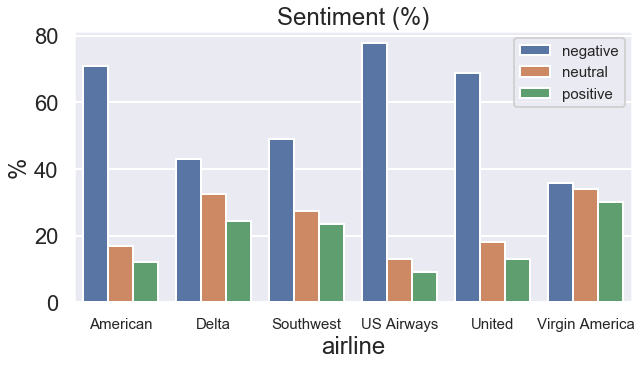

In [50]:
#set plot style and size
sns.set(style="darkgrid", context="poster")
sns.set_context({"figure.figsize": (10, 5)})
sns.barplot(x='airline', y='numbers', data=train_airco_percent1, hue='airline_sentiment')
plt.title('Sentiment (%)')
plt.legend(prop={'size': 15})
plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
plt.ylabel('%')

## Processing to clean the words of training dataset

In [12]:
train_senti = train[['airline_sentiment','full_text_processed']]

In [13]:
# remove special characters, numbers, punctuations
train_senti['tidy_text'] = train_senti['full_text_processed'].str.replace("[^a-zA-Z#]", " ")

C:\Users\mende\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
train_senti.head()

airline_sentiment                                full_text_processed  \
0           neutral                    @virginamerica @dhepburn said .   
1          positive  @virginamerica plus added commercial experienc...   
2           neutral  @virginamerica today ... must mean need take a...   
3          negative  @virginamerica really aggressive blast obnoxio...   
4          negative                @virginamerica really big bad thing   

                                           tidy_text  
0                     virginamerica  dhepburn said    
1   virginamerica plus added commercial experienc...  
2   virginamerica today     must mean need take a...  
3   virginamerica really aggressive blast obnoxio...  
4                 virginamerica really big bad thing

### Remove meaningless word in all tweets
### Word ususally have to be more than two letters to be meaningful, https is just a website title

In [15]:
train_senti['tidy_text'] = train_senti['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3 and w != 'http']))

C:\Users\mende\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
train_senti.head()

airline_sentiment                                full_text_processed  \
0           neutral                    @virginamerica @dhepburn said .   
1          positive  @virginamerica plus added commercial experienc...   
2           neutral  @virginamerica today ... must mean need take a...   
3          negative  @virginamerica really aggressive blast obnoxio...   
4          negative                @virginamerica really big bad thing   

                                           tidy_text  
0                        virginamerica dhepburn said  
1  virginamerica plus added commercial experience...  
2  virginamerica today must mean need take anothe...  
3  virginamerica really aggressive blast obnoxiou...  
4                         virginamerica really thing

In [17]:
train_senti['tidy_token'] = train_senti['tidy_text'].apply(lambda x: x.split())
train_senti.head()

C:\Users\mende\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


airline_sentiment                                full_text_processed  \
0           neutral                    @virginamerica @dhepburn said .   
1          positive  @virginamerica plus added commercial experienc...   
2           neutral  @virginamerica today ... must mean need take a...   
3          negative  @virginamerica really aggressive blast obnoxio...   
4          negative                @virginamerica really big bad thing   

                                           tidy_text  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercial experience...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                         virginamerica really thing   

                                          tidy_token  
0                    [virginamerica, dhepburn, said]  
1  [virginamerica, plus, added, commercial, exper...  
2  [virginamerica, today, must, mean, need, take,...  
3  [virginamerica, really, aggressive, blast, obn...  
4                     [virginamerica, really, thing]

## Kaggle dataset
## Prepared data for WordCloud
## WordCloud

In [18]:
train_senti_grouped=train_senti[['airline_sentiment','tidy_text']].groupby(by='airline_sentiment').agg(lambda x:' '.join(x))
train_senti_grouped.head()

tidy_text
airline_sentiment                                                   
negative           virginamerica really aggressive blast obnoxiou...
neutral            virginamerica dhepburn said virginamerica toda...
positive           virginamerica plus added commercial experience...

In [19]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

In [20]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(train_senti_grouped['tidy_text'])
df_text = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_text.index=train_senti_grouped.index
df_text.head()

aaaand  aaadvantage  aaalwayslate  aacustomerservice  \
airline_sentiment                                                         
negative                1            1             0                  1   
neutral                 0            0             1                  0   
positive                0            0             0                  0   

                   aadavantage  aadelay  aadv  aadvantage  aafail  aakjumxa  \
airline_sentiment                                                             
negative                     0        1     2           4       2         0   
neutral                      1        0     0           6       0         1   
positive                     0        0     0           0       0         0   

                   ...  zurich  zvfmxnuelj  zvhco  zvugmkjw  zwmuoon  zwzc  \
airline_sentiment  ...                                                       
negative           ...       3           1      1         0        1     0   
neutral            ...       2           0      0         1        0     1   
positive           ...       0           0      0         0        0     0   

                   zxzn  zygjs  zzkqwwbjz  zzps  
airline_sentiment                                
negative              0      0          0     1  
neutral               1      1          1     0  
positive              0      0          0     0  

[3 rows x 11313 columns]

In [21]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=1000,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [25]:
# Transposing document term matrix
df_text = df_text.transpose()

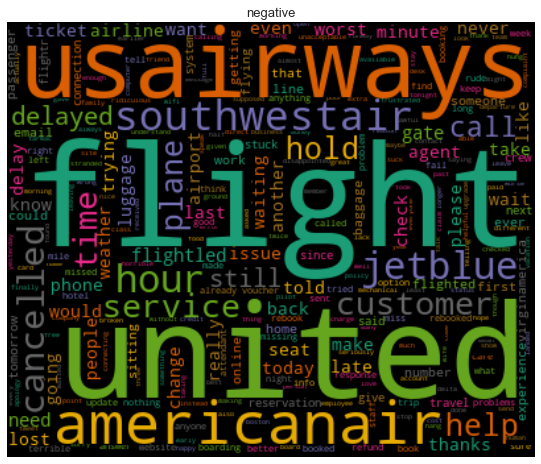

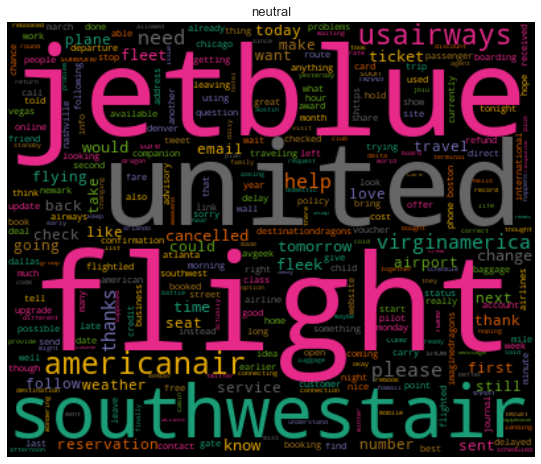

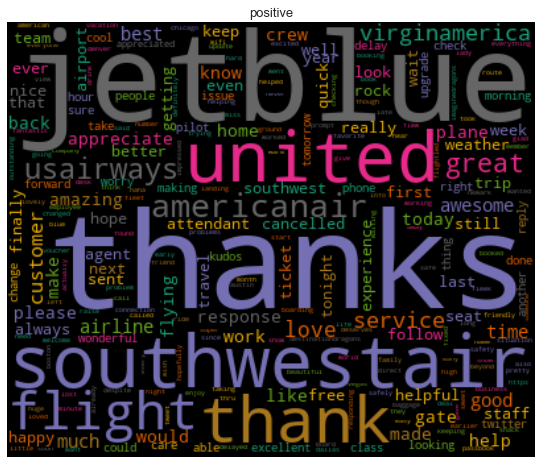

In [23]:
# Plotting word cloud for each product
for index,product in enumerate(df_text.columns):
  generate_wordcloud(df_text[product].sort_values(ascending=False),product)

## Kaggle dataset - Top words finding

In [65]:
train_senti_grouped.head()

tidy_text
airline_sentiment                                                   
negative           virginamerica really aggressive blast obnoxiou...
neutral            virginamerica dhepburn said virginamerica toda...
positive           virginamerica plus added commercial experience...

In [66]:
neg = train_senti_grouped.tidy_text[0]
neg = neg.split()
fdist_neg = nltk.FreqDist(neg)
fdist_neg.most_common(20)

[('flight', 3329),
 ('united', 2877),
 ('usairways', 2347),
 ('americanair', 2109),
 ('southwestair', 1214),
 ('hour', 1086),
 ('jetblue', 1022),
 ('cancelled', 919),
 ('customer', 776),
 ('service', 769),
 ('time', 747),
 ('hold', 616),
 ('help', 604),
 ('plane', 599),
 ('call', 509),
 ('delayed', 502),
 ('still', 492),
 ('flightled', 448),
 ('need', 431),
 ('gate', 429)]

In [67]:
x, y = zip(*fdist_neg.most_common(20))

Text(0.5, 1.0, 'Negative Top words')

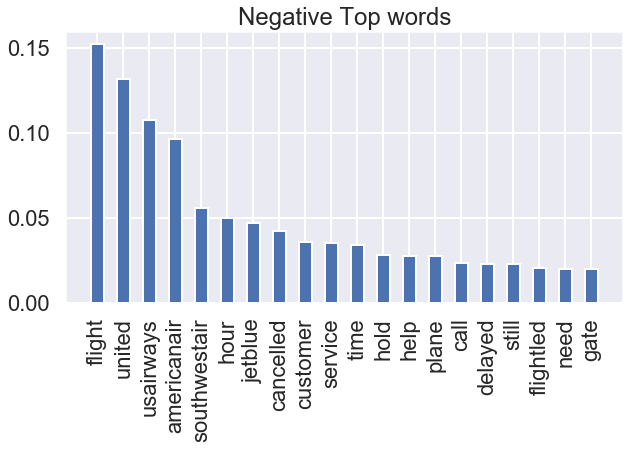

In [68]:
plt.bar(x, y/np.sum(y), width=0.5)
#plt.yticks(fontsize=15)
plt.xticks(rotation = 90)
plt.title('Negative Top words')

Text(0.5, 1.0, 'Neutral Top words')

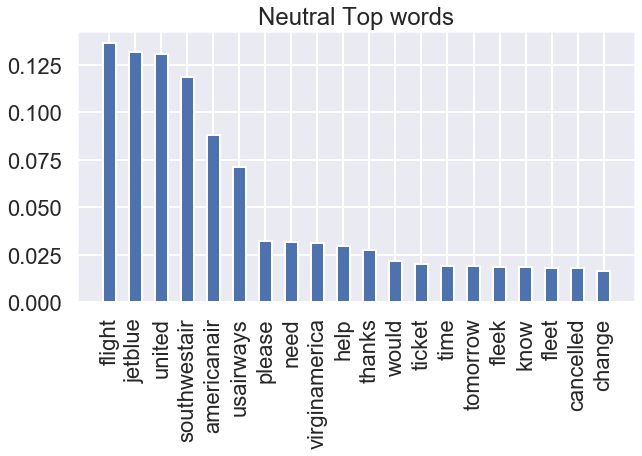

In [69]:
neu = train_senti_grouped.tidy_text[1]
neu = neu.split()
fdist_neu = nltk.FreqDist(neu)
fdist_neu.most_common(20)
x, y = zip(*fdist_neu.most_common(20))
plt.bar(x, y/np.sum(y), width=0.5)
#plt.yticks(fontsize=15)
plt.xticks(rotation = 90)
plt.title('Neutral Top words')

Text(0.5, 1.0, 'Positive Top words')

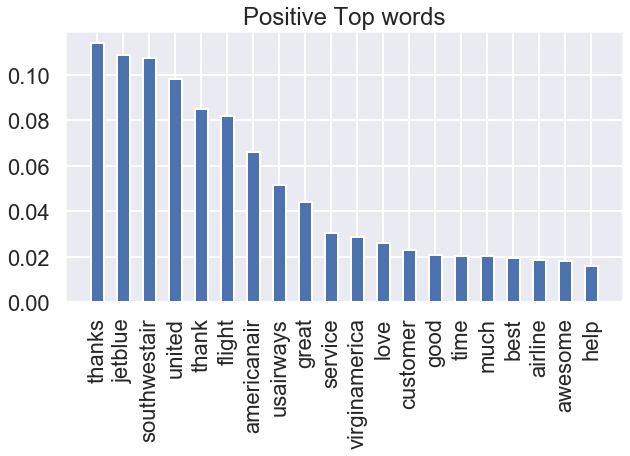

In [70]:
pos = train_senti_grouped.tidy_text[2]
pos = pos.split()
fdist_pos = nltk.FreqDist(pos)
fdist_pos.most_common(20)
x, y = zip(*fdist_pos.most_common(20))
plt.bar(x, y/np.sum(y), width=0.5)
#plt.yticks(fontsize=15)
plt.xticks(rotation = 90)
plt.title('Positive Top words')

## Kaggle dataset - Hashtags

In [71]:
train_senti.head()

airline_sentiment                                full_text_processed  \
0           neutral                    @virginamerica @dhepburn said .   
1          positive  @virginamerica plus added commercial experienc...   
2           neutral  @virginamerica today ... must mean need take a...   
3          negative  @virginamerica really aggressive blast obnoxio...   
4          negative                @virginamerica really big bad thing   

                                           tidy_text  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercial experience...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                         virginamerica really thing   

                                          tidy_token  
0                    [virginamerica, dhepburn, said]  
1  [virginamerica, plus, added, commercial, exper...  
2  [virginamerica, today, must, mean, need, take,...  
3  [virginamerica, really, aggressive, blast, obn...  
4                     [virginamerica, really, thing]

In [72]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [73]:
# extracting hashtags from positive texts

HT_positive = hashtag_extract(train_senti['tidy_text'][train_senti['airline_sentiment'] == 'positive'])

# extracting hashtags from neutral texts

HT_neutral = hashtag_extract(train_senti['tidy_text'][train_senti['airline_sentiment'] == 'neutral'])

# extracting hashtags from negative texts
HT_negative = hashtag_extract(train_senti['tidy_text'][train_senti['airline_sentiment'] == 'negative'])

In [74]:
HT_positive

[[],
 [],
 [],
 [],
 [],
 [],
 ['fabulous', 'seductive', 'stress'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['moodlitmonday'],
 [],
 [],
 ['elevategold'],
 [],
 [],
 ['guiltypleasures'],
 [],
 [],
 [],
 [],
 [],
 ['inflight', 'flightattendant', 'dreampath'],
 ['customerservice', 'virginamerica', 'flying'],
 ['cheapflights', 'farecompare'],
 ['cheapflights', 'farecompare'],
 [],
 ['phl', 'pleasecomeback'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['vabeatsjblue'],
 ['oscars', 'redcarpet', 'oscars', 'oscars'],
 [],
 ['irmafromdallas'],
 ['princesshalf'],
 [],
 ['flight', 'sunset', 'globe', 'backtowinter', 'work', 'refreshed'],
 [],
 [],
 [],
 ['elevate', 'gold'],
 ['americanairlines'],
 [],
 [],
 [],
 [],
 [],
 ['beatstheothers'],
 ['seriously'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['meetthefleet', 'oscars'],
 [],
 ['disruption', 'fcmostinnovative', 'incubator'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['airplanemodewason'],
 ['boston', 'sanfrancisco'],
 [],
 ['vodkatonics', 'sfo'],
 [],
 ['sweet'],
 [],
 ['amazing

In [75]:
# unnesting list
HT_positive = sum(HT_positive,[])
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])

In [76]:
HT_positive

['fabulous',
 'seductive',
 'stress',
 'moodlitmonday',
 'elevategold',
 'guiltypleasures',
 'inflight',
 'flightattendant',
 'dreampath',
 'customerservice',
 'virginamerica',
 'flying',
 'cheapflights',
 'farecompare',
 'cheapflights',
 'farecompare',
 'phl',
 'pleasecomeback',
 'vabeatsjblue',
 'oscars',
 'redcarpet',
 'oscars',
 'oscars',
 'irmafromdallas',
 'princesshalf',
 'flight',
 'sunset',
 'globe',
 'backtowinter',
 'work',
 'refreshed',
 'elevate',
 'gold',
 'americanairlines',
 'beatstheothers',
 'seriously',
 'meetthefleet',
 'oscars',
 'disruption',
 'fcmostinnovative',
 'incubator',
 'airplanemodewason',
 'boston',
 'sanfrancisco',
 'vodkatonics',
 'sfo',
 'sweet',
 'amazing',
 'sorrynotsorry',
 'comps',
 'rockstars',
 'travel',
 'travel',
 'san',
 'sfo',
 'sanfrancisco',
 'livewelltraveled',
 'sytycd',
 'texas',
 'moodlighting',
 'thankyou',
 'freeneversucks',
 'virginamerica',
 'weather',
 'sciencebehindtheexperience',
 'myvxexperience',
 'nyc',
 'philly',
 'wervirgin

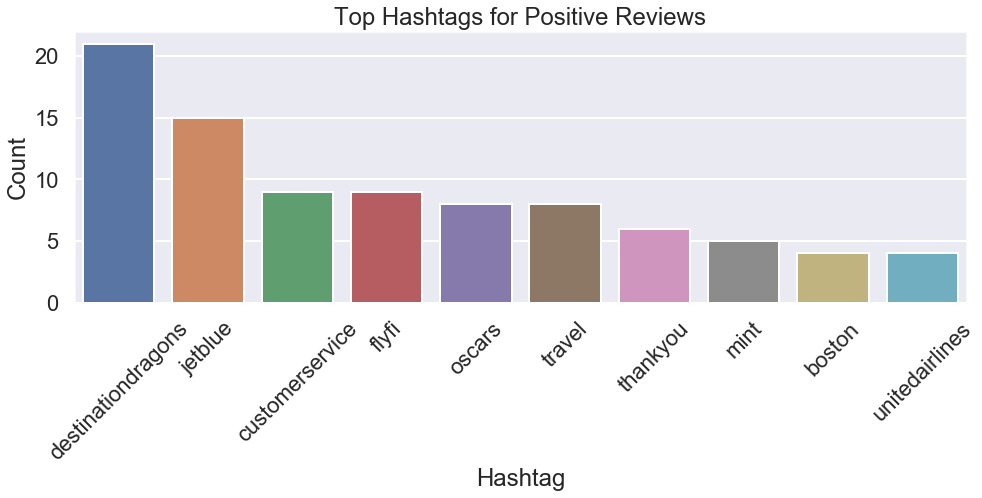

In [77]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.title('Top Hashtags for Positive Reviews')
plt.xlabel('Hashtag')
plt.xticks(rotation=45)
plt.ylabel('Count')
#plt.yticks(fontsize=15)
plt.show()

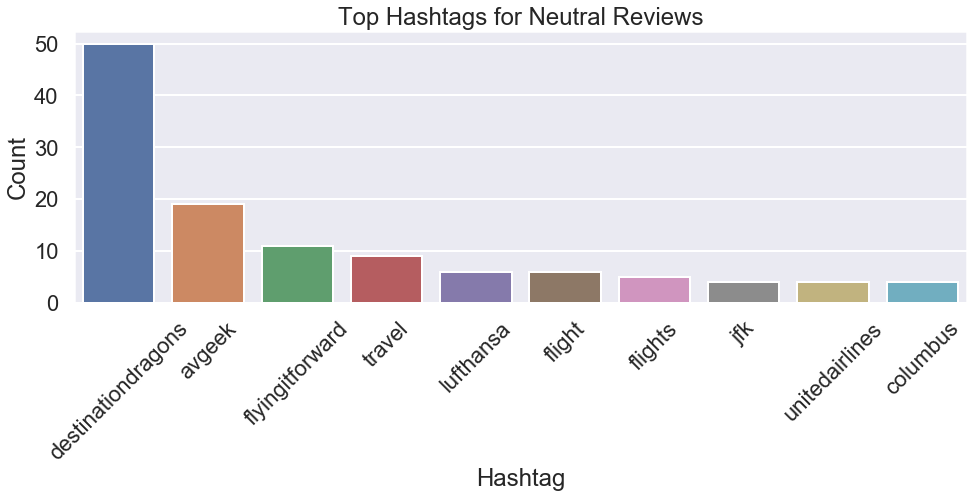

In [78]:
c = nltk.FreqDist(HT_neutral)
f = pd.DataFrame({'Hashtag': list(c.keys()), 'Count': list(c.values())})
# selecting top 10 most frequent hashtags
f = f.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
sns.barplot(data=f, x= "Hashtag", y = "Count")
plt.title('Top Hashtags for Neutral Reviews')
plt.xlabel('Hashtag')
plt.xticks(rotation=45)
plt.ylabel('Count')
#plt.yticks(fontsize=15)
plt.show()

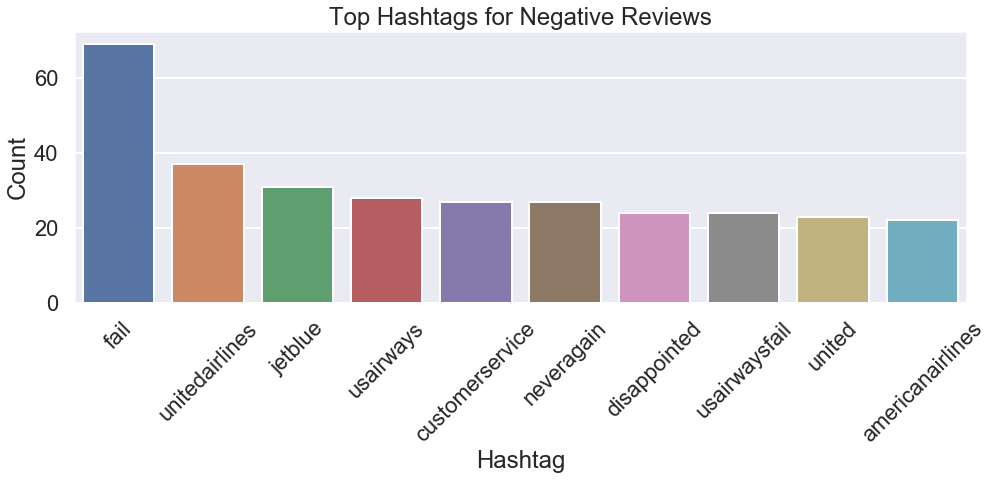

In [79]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
sns.barplot(data=e, x= "Hashtag", y = "Count")
plt.title('Top Hashtags for Negative Reviews')
plt.xlabel('Hashtag')
plt.xticks(rotation=45)
plt.ylabel('Count')
#plt.yticks(fontsize=15)
plt.show()

## Timeseries relationships with sentiment

In [80]:
train_nofeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 0 to 14639
Data columns (total 28 columns):
Unnamed: 0                      14640 non-null int64
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
hashtags                        0 non-

In [81]:
train_nofeature['date'] = pd.to_datetime(train_nofeature['tweet_created']).dt.date

In [83]:
train_nofeature.groupby(['date', 'airline_sentiment'])['tweet_id'].count()

date        airline_sentiment
2015-02-16  negative                3
            neutral                 1
2015-02-17  negative              838
            neutral               297
            positive              273
2015-02-18  negative              736
            neutral               335
            positive              273
2015-02-19  negative              751
            neutral               329
            positive              296
2015-02-20  negative              835
            neutral               383
            positive              282
2015-02-21  negative             1049
            neutral               278
            positive              230
2015-02-22  negative             2266
            neutral               463
            positive              350
2015-02-23  negative             1919
            neutral               676
            positive              433
2015-02-24  negative              781
            neutral               337
            positive

In [84]:
train_date = train_nofeature.groupby(['date', 'airline_sentiment'])['tweet_id'].count()

In [85]:
train_date1 = train_date.reset_index(drop=False)

In [86]:
train_date1

date airline_sentiment  tweet_id
0   2015-02-16          negative         3
1   2015-02-16           neutral         1
2   2015-02-17          negative       838
3   2015-02-17           neutral       297
4   2015-02-17          positive       273
5   2015-02-18          negative       736
6   2015-02-18           neutral       335
7   2015-02-18          positive       273
8   2015-02-19          negative       751
9   2015-02-19           neutral       329
10  2015-02-19          positive       296
11  2015-02-20          negative       835
12  2015-02-20           neutral       383
13  2015-02-20          positive       282
14  2015-02-21          negative      1049
15  2015-02-21           neutral       278
16  2015-02-21          positive       230
17  2015-02-22          negative      2266
18  2015-02-22           neutral       463
19  2015-02-22          positive       350
20  2015-02-23          negative      1919
21  2015-02-23           neutral       676
22  2015-02-23          positive       433
23  2015-02-24          negative       781
24  2015-02-24           neutral       337
25  2015-02-24          positive       226

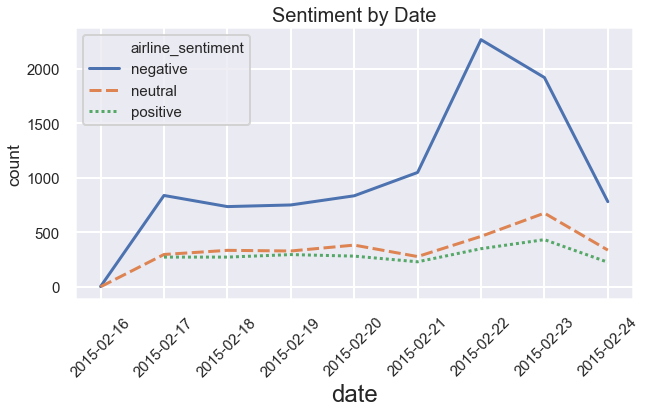

In [87]:
#sns.set_style('ticks')
sns.set(style="darkgrid", context="poster")
sns.lineplot(x='date', y='tweet_id', data=train_date1, hue='airline_sentiment', style='airline_sentiment')
plt.title('Sentiment by Date', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('count', fontsize=17.5)
plt.legend(loc=2, prop={'size': 15})

In [92]:
testing_nofeature['date'] = pd.to_datetime(testing['tweet_created']).dt.date

In [93]:
testing_nofeature['date'].head()

14640    2020-11-14
14641    2020-11-14
14642    2020-11-14
14643    2020-11-14
14644    2020-11-14
Name: date, dtype: object

In [94]:
testing_nofeature.groupby(['date'])['tweet_id'].count()

date
2020-11-07      58
2020-11-08    1901
2020-11-09    2723
2020-11-10    4495
2020-11-11    4410
2020-11-12    4324
2020-11-13    4404
2020-11-14    5664
2020-11-15    2636
2020-11-17    4456
2020-11-18    4296
2020-11-19    3751
2020-11-20    3110
2020-11-21    2654
2020-11-22    2920
2020-11-23    3613
2020-11-24    2951
2020-11-25    8844
2020-11-26    4822
2020-11-27    2154
2020-11-28    2544
2020-11-29    3262
2020-11-30    7515
2020-12-01    8108
Name: tweet_id, dtype: int64

Text(0, 0.5, 'count')

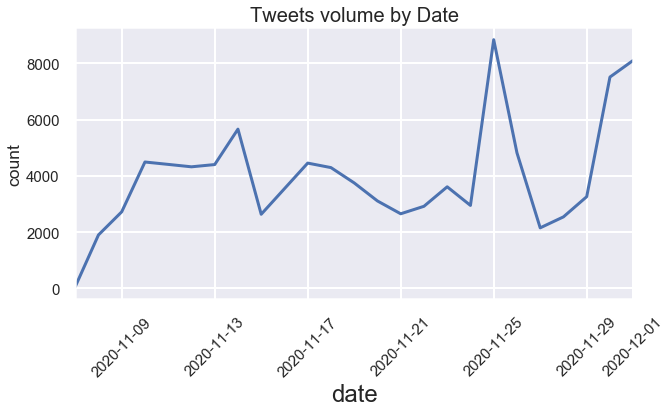

In [95]:
testing_nofeature1 = testing_nofeature.groupby(['date'])['tweet_id'].count()
testing_nofeature1.plot()
plt.title('Tweets volume by Date', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('count', fontsize=17.5)

In [96]:
testing_nofeature.groupby(['airline'])['tweet_id'].count()

airline
Alaska Air          6060
American           23820
Cape Air              58
Delta              21977
Fly Frontier        1332
Haiwaiin Air        1007
Jet Blue            5263
Southwest          18781
Spirit Airlines     2955
Sun Country Air      207
US Airways            23
United             14107
Virgin America        25
Name: tweet_id, dtype: int64

Text(0, 0.5, 'count')

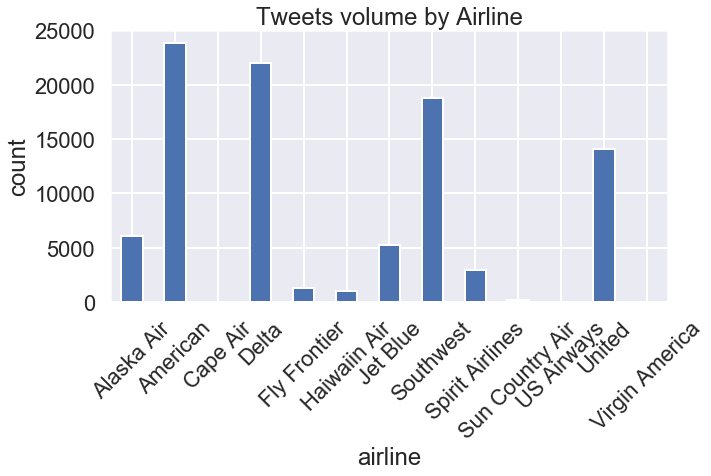

In [97]:
testing_nofeature.groupby(['airline'])['tweet_id'].count().plot(kind='bar')
plt.title('Tweets volume by Airline')
plt.xticks(rotation=45)
#plt.yticks(fontsize=15)
plt.ylabel('count')

## API dataset - Top Words & Hashtags

In [98]:
# remove special characters, numbers, punctuations
testing['tidy_text'] = testing['full_text_processed'].str.replace("[^a-zA-Z#]", " ")
testing['tidy_text'] = testing['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3 and w != 'https']))

C:\Users\mende\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mende\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
testing['tidy_text'].head()

14640    reason united wait wear uniform #blacklivesmat...
14641    landed volunteering teamrubicon thanks support...
14642                        riverboatronhc united amazing
14643    illegal ballot harvesting uncovered tzauxff un...
14644                      broncos jsimms astronaut united
Name: tidy_text, dtype: object

In [100]:
testing['tidy_text'].sum()

'reason united wait wear uniform #blacklivesmatter caerkzlxodlanded volunteering teamrubicon thanks support united airlinkflight starbucks ugydpcoriverboatronhc united amazingillegal ballot harvesting uncovered tzauxff united patriot newsbroncos jsimms astronaut unitedriverboatronhc united flight attendant heard young cancer patient spoke serenaded baby sharkiphone camera going take epic united #mikeshots sure tonight #myunitedjourney #lovethejourney asvmcriverboatronhc united flight attendant heard young cancer patient spoke serenaded baby sharkunited hehe sell costco bulk course boughtriverboatronhc united flight attendant heard young cancer patient spoke serenaded baby sharkbayou bound #sfvsno unitedunited back baby qdkyfe cxrokriverboatronhc united people kind factriverboatronhc united flight attendant heard young cancer patient spoke serenaded baby sharkbritish airways cheaper united least give full size sodabroncos jsimms astronaut united take care business saferiverboatronhc uni

In [101]:
test1 = testing['tidy_text'].sum()
test1 = test1.split()

Text(0.5, 1.0, 'Top words - testing dataset')

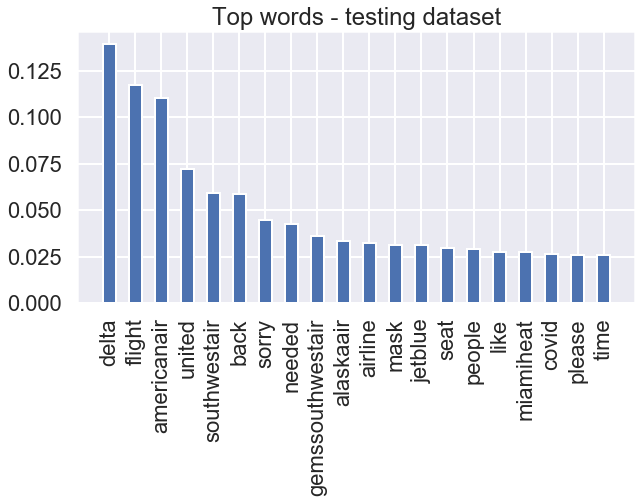

In [102]:
fdist1 = nltk.FreqDist(test1)
fdist1.most_common(20)
x, y = zip(*fdist1.most_common(20))
plt.bar(x, y/np.sum(y), width=0.5)
#plt.yticks(fontsize=15)
plt.xticks(rotation = 90)
plt.title('Top words - testing dataset')

In [103]:
HT_testing = hashtag_extract(testing['tidy_text'])

In [104]:
HT_testing = sum(HT_testing,[])

In [105]:
HT_testing

['blacklivesmatter',
 'mikeshots',
 'myunitedjourney',
 'lovethejourney',
 'sfvsno',
 'houston',
 'travel',
 'houston',
 'travel',
 'houston',
 'travel',
 'houston',
 'travel',
 'united',
 'travel',
 'creditcards',
 'puertovallarta',
 'yourperfectday',
 'travelgoals',
 'travel',
 'covid',
 'covid',
 'coronavirus',
 'airtravel',
 'airlinetravel',
 'sfo',
 'dtw',
 'traveltips',
 'travelsafety',
 'airsafety',
 'avgeek',
 'avgeek',
 'gocats',
 'gocats',
 'gocats',
 'gocats',
 'gocats',
 'gocats',
 'cancerfighter',
 'beingunited',
 'uaifsbaseewr',
 'sfvsno',
 'unitedairlinesdoesnotcare',
 'caribbeanfever',
 'chicago',
 'travel',
 'beatthewildcats',
 'boston',
 'travel',
 'boston',
 'travel',
 'boston',
 'travel',
 'openopenopen',
 'peppermintlatte',
 'unitedairlinesdoesnotcare',
 'friendlyskies',
 'unitednation',
 'lannatonmodi',
 'bedecent',
 'beatthewildcats',
 'cancelunitedairlines',
 'beatthewildcats',
 'madrid',
 'travel',
 'madrid',
 'travel',
 'beatthewildcats',
 'caribbeanfever',
 '

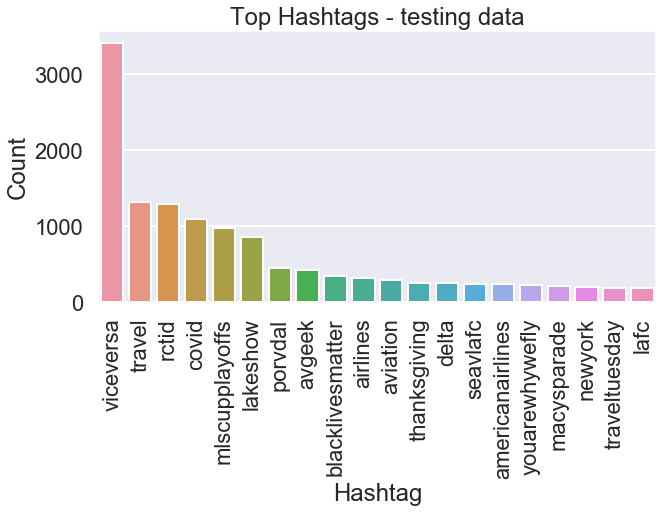

In [106]:
a = nltk.FreqDist(HT_testing)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
#plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.title('Top Hashtags - testing data')
plt.xlabel('Hashtag')
plt.xticks(rotation=90)
plt.ylabel('Count')
#plt.yticks(fontsize=15)
plt.show()